#  Creating new features 

## Getting additional features from the Alpha vantage API 

### Bitcoin FCAS Rating 

In [1]:
# imports 
import requests
import pandas as pd 

In [2]:
API_key = 'BPXVULLGKWW3Z16Y'

In [3]:
# Crypto rating 
symbol = 'BTC'
url = f'https://www.alphavantage.co/query?function=CRYPTO_RATING&symbol={symbol}&apikey={API_key}'
r = requests.get(url)
data = r.json()
df = pd.DataFrame(data)
print(df)

                         Crypto Rating (FCAS)
1. symbol                                 BTC
2. name                               Bitcoin
3. fcas rating                     Attractive
4. fcas score                             884
5. developer score                        831
6. market maturity score                  861
7. utility score                          954
8. last refreshed         2021-09-01 00:00:00
9. timezone                               UTC


## Getting blockchain features from blockchain.info API 

### mining difficulty

In [5]:
url = 'https://blockchain.info/q/getdifficulty'
r = requests.get(url)
mining_difficulty = r.json()

mining_difficulty

17615033039278.0

### Block count

In [6]:
url = 'https://blockchain.info/q/getblockcount'
r = requests.get(url)
block_count = r.json()
block_count

698661

## Transforming features to get technical analysis features

### Getting the price and volume data from financialmodelingprep.com API 

In [11]:
api_key='a58413697e8263de9c95cab92049ea3f'
symbol='BTCUSD'
query=f'https://financialmodelingprep.com/api/v3/historical-price-full/{symbol}?apikey={api_key}'
response=requests.get(query)
df = pd.DataFrame(response.json()['historical'])
df

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
0,2021-09-02,48840.414063,49817.667969,48767.839844,49598.503906,49598.503906,3.908957e+10,3.908957e+10,758.08984,1.552,49394.67057,"September 02, 21",0.01552
1,2021-09-01,47099.773438,49111.089844,46562.437500,48847.027344,48847.027344,3.913940e+10,3.913940e+10,1747.25391,3.710,48173.51823,"September 01, 21",0.03710
2,2021-08-31,47024.339844,48189.550781,46750.093750,47166.687500,47166.687500,3.473036e+10,3.473036e+10,142.34766,0.303,47368.77734,"August 31, 21",0.00303
3,2021-08-30,48834.851563,48925.605469,46950.273438,47054.984375,47054.984375,3.184701e+10,3.184701e+10,-1779.86719,-3.645,47643.62109,"August 30, 21",-0.03645
4,2021-08-29,48911.250000,49644.113281,47925.855469,48829.832031,48829.832031,2.588965e+10,2.588965e+10,-81.41797,-0.166,48799.93359,"August 29, 21",-0.00166
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2016-09-06,606.505981,610.830017,605.091003,610.435974,610.435974,7.852910e+07,7.852910e+07,3.92999,0.648,608.78566,"September 06, 16",0.00648
1823,2016-09-05,608.989990,609.054993,602.242004,606.590027,606.590027,8.244680e+07,8.244680e+07,-2.39996,-0.394,605.96234,"September 05, 16",-0.00394
1824,2016-09-04,598.590027,611.836975,596.848022,608.633972,608.633972,9.794290e+07,9.794290e+07,10.04395,1.678,605.77299,"September 04, 16",0.01678
1825,2016-09-03,575.554993,599.500000,574.056030,598.211975,598.211975,1.590140e+08,1.590140e+08,22.65698,3.937,590.58934,"September 03, 16",0.03937


In [31]:
df.head()

,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime,UpperBB,LowerBB,volatility
date,,,,,,,,,,,,,,,
2021-09-02,48840.414063,49817.667969,48767.839844,49598.503906,49598.503906,3.908957e+10,3.908957e+10,758.08984,1.552,49394.67057,"September 02, 21",0.01552,NaN,NaN,NaN
2021-09-01,47099.773438,49111.089844,46562.437500,48847.027344,48847.027344,3.913940e+10,3.913940e+10,1747.25391,3.710,48173.51823,"September 01, 21",0.03710,NaN,NaN,NaN
2021-08-31,47024.339844,48189.550781,46750.093750,47166.687500,47166.687500,3.473036e+10,3.473036e+10,142.34766,0.303,47368.77734,"August 31, 21",0.00303,NaN,NaN,NaN
2021-08-30,48834.851563,48925.605469,46950.273438,47054.984375,47054.984375,3.184701e+10,3.184701e+10,-1779.86719,-3.645,47643.62109,"August 30, 21",-0.03645,NaN,NaN,NaN
2021-08-29,48911.250000,49644.113281,47925.855469,48829.832031,48829.832031,2.588965e+10,2.588965e+10,-81.41797,-0.166,48799.93359,"August 29, 21",-0.00166,NaN,NaN,NaN


In [13]:
df['date']= pd.to_datetime(df['date'])

In [14]:
df.set_index('date', inplace = True)

### Computing moving averages

[None, None, None, None, None, None, None, None, None, None, None, None]

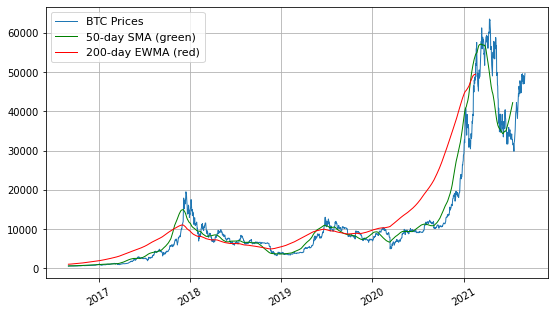

In [32]:
# Moving Averages Code

# Load the necessary packages and modules
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import yfinance
import pandas as pd


# Simple Moving Average 
def SMA(data, ndays): 
    SMA = pd.Series(data['close'].rolling(ndays).mean(), name = 'SMA') 
    data = data.join(SMA) 
    return data

# Exponentially-weighted Moving Average 
def EWMA(data, ndays): 
    EMA = pd.Series(data['close'].ewm(span = ndays, min_periods = ndays - 1).mean(), 
                 name = 'EWMA_' + str(ndays)) 
    data = data.join(EMA) 
    return data

# Retrieve the BTC data from our dataset:
data = df
close = data['close']

# Compute the 50-day 
n = 50
SMA_BTC = SMA(data,n)
SMA_BTC = SMA_BTC.dropna()
SMA = SMA_BTC['SMA']

# Compute the 200-day EWMA 
ew = 200
EWMA_BTC = EWMA(data,ew)
EWMA_BTC = EWMA_BTC.dropna()
EWMA = EWMA_BTC['EWMA_200']

# Plotting the BTC Price Series chart and Moving Averages below
plt.figure(figsize=(9,5))
plt.plot(data['close'],lw=1, label='BTC Prices')
plt.plot(SMA,'g',lw=1, label='50-day SMA (green)')
plt.plot(EWMA,'r', lw=1, label='200-day EWMA (red)')
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)

In [47]:
df.drop(columns = ['label'])

,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,changeOverTime,UpperBB,LowerBB,volatility
date,,,,,,,,,,,,,,
2016-09-02,572.409973,575.643005,570.810974,575.536987,575.536987,7.991080e+07,7.991080e+07,3.12701,0.546,573.99699,0.00546,643.313521,586.843999,NaN
2016-09-03,575.554993,599.500000,574.056030,598.211975,598.211975,1.590140e+08,1.590140e+08,22.65698,3.937,590.58934,0.03937,645.071115,588.356686,NaN
2016-09-04,598.590027,611.836975,596.848022,608.633972,608.633972,9.794290e+07,9.794290e+07,10.04395,1.678,605.77299,0.01678,647.949116,587.833045,NaN
2016-09-05,608.989990,609.054993,602.242004,606.590027,606.590027,8.244680e+07,8.244680e+07,-2.39996,-0.394,605.96234,-0.00394,650.387891,587.199350,NaN
2016-09-06,606.505981,610.830017,605.091003,610.435974,610.435974,7.852910e+07,7.852910e+07,3.92999,0.648,608.78566,0.00648,653.049884,586.577276,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-29,48911.250000,49644.113281,47925.855469,48829.832031,48829.832031,2.588965e+10,2.588965e+10,-81.41797,-0.166,48799.93359,-0.00166,NaN,NaN,1645.660840
2021-08-30,48834.851563,48925.605469,46950.273438,47054.984375,47054.984375,3.184701e+10,3.184701e+10,-1779.86719,-3.645,47643.62109,-0.03645,NaN,NaN,1583.112611
2021-08-31,47024.339844,48189.550781,46750.093750,47166.687500,47166.687500,3.473036e+10,3.473036e+10,142.34766,0.303,47368.77734,0.00303,NaN,NaN,1332.427984


### Bollinger bands

<AxesSubplot:xlabel='date'>

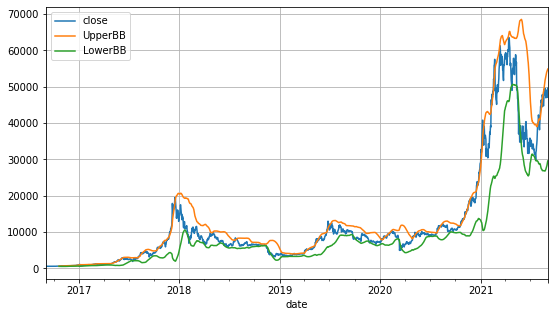

In [81]:
# Compute the Bollinger Bands 
def BBANDS(data, window=n):
    MA = data.close.rolling(window=n).mean()
    SD = data.close.rolling(window=n).std()
    data['UpperBB'] = MA + (2 * SD) 
    data['LowerBB'] = MA - (2 * SD)
    return data
 
# Compute the Bollinger Bands for BTC using the 50-day Moving average
n = 50
BTC_BBANDS = BBANDS(data, n)
#print(BTC_BBANDS)

# Create the plot
pd.concat([BTC_BBANDS.close,BTC_BBANDS.UpperBB,BTC_BBANDS.LowerBB],axis=1).plot(figsize=(9,5),grid=True)

### RSI

In [62]:
def rsi(df, periods = 14, ema = True):
    """
    Returns a pd.Series with the relative strength index.
    """
    close_delta = df['close'].diff()

    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    if ema == True:
    # Use exponential moving average
        ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    else:
        # Use simple moving average
        ma_up = up.rolling(window = periods, adjust=False).mean()
        ma_down = down.rolling(window = periods, adjust=False).mean()
        
    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi

In [64]:
rsi = rsi(df)

[None, None, None, None, None, None, None, None, None, None, None, None]

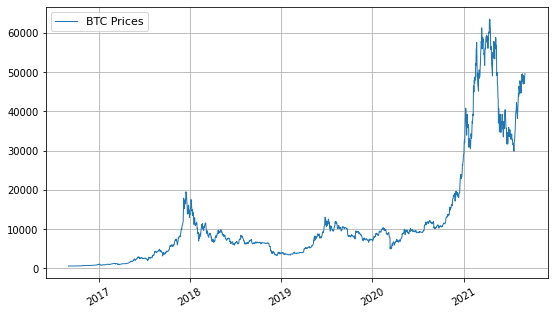

In [60]:
plt.figure(figsize=(9,5))
plt.plot(data['close'],lw=1, label='BTC Prices')
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)

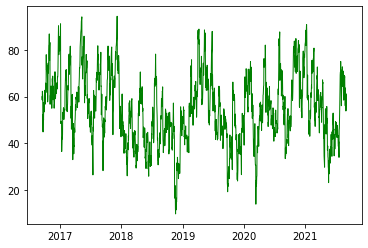

In [65]:
plt.plot(rsi,'g',lw=1, label='50-day SMA (green)')

In [75]:
df['rsi'] = rsi.tolist()

In [76]:
df

,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime,UpperBB,LowerBB,volatility,rsi
date,,,,,,,,,,,,,,,,
2016-09-02,572.409973,575.643005,570.810974,575.536987,575.536987,7.991080e+07,7.991080e+07,3.12701,0.546,573.99699,"September 02, 16",0.00546,643.313521,586.843999,NaN,NaN
2016-09-03,575.554993,599.500000,574.056030,598.211975,598.211975,1.590140e+08,1.590140e+08,22.65698,3.937,590.58934,"September 03, 16",0.03937,645.071115,588.356686,NaN,NaN
2016-09-04,598.590027,611.836975,596.848022,608.633972,608.633972,9.794290e+07,9.794290e+07,10.04395,1.678,605.77299,"September 04, 16",0.01678,647.949116,587.833045,NaN,NaN
2016-09-05,608.989990,609.054993,602.242004,606.590027,606.590027,8.244680e+07,8.244680e+07,-2.39996,-0.394,605.96234,"September 05, 16",-0.00394,650.387891,587.199350,NaN,NaN
2016-09-06,606.505981,610.830017,605.091003,610.435974,610.435974,7.852910e+07,7.852910e+07,3.92999,0.648,608.78566,"September 06, 16",0.00648,653.049884,586.577276,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-29,48911.250000,49644.113281,47925.855469,48829.832031,48829.832031,2.588965e+10,2.588965e+10,-81.41797,-0.166,48799.93359,"August 29, 21",-0.00166,NaN,NaN,1645.660840,60.474282
2021-08-30,48834.851563,48925.605469,46950.273438,47054.984375,47054.984375,3.184701e+10,3.184701e+10,-1779.86719,-3.645,47643.62109,"August 30, 21",-0.03645,NaN,NaN,1583.112611,53.848934
2021-08-31,47024.339844,48189.550781,46750.093750,47166.687500,47166.687500,3.473036e+10,3.473036e+10,142.34766,0.303,47368.77734,"August 31, 21",0.00303,NaN,NaN,1332.427984,54.189103


### Standard deviation and volatility

In [ ]:
import statistics as st
import numpy as np

In [ ]:
# Calculate daily log return 
df['returns'] = (np.log(df.close /
    df.close.shift(-1)))

In [ ]:
# calculate daily standard deviation of returns
daily_std = np.std(df.returns)

In [39]:
df.sort_index(inplace = True)

In [71]:
n= 14
# volatility is the 14 days standard deviation 
def volatility(df,n):
    volatil = df.close.rolling(n).std(ddof=0)
    return volatil 
df['volatility'] = volatility(df,n)
volatility(df,n)

date
2016-09-02            NaN
2016-09-03            NaN
2016-09-04            NaN
2016-09-05            NaN
2016-09-06            NaN
                 ...     
2021-08-29    1645.660840
2021-08-30    1583.112611
2021-08-31    1332.427984
2021-09-01     980.043228
2021-09-02     909.622739
Name: close, Length: 1827, dtype: float64

### Moving Average Convergence Divergence (MACD)

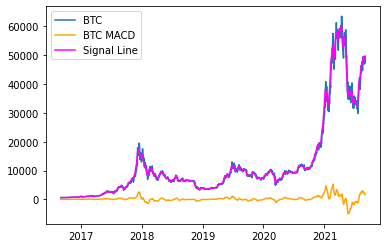

In [41]:
def macd(df):
    exp1 = df.close.ewm(span=12, adjust=False).mean()
    exp2 = df.close.ewm(span=26, adjust=False).mean()
    exp3 = df.close.ewm(span=9, adjust=False).mean()
    macd = exp1-exp2
    return macd
plt.plot(df.close, label='BTC')
plt.plot(macd(df), label='BTC MACD', color='orange')
plt.plot(exp3, label='Signal Line', color='Magenta')
plt.legend(loc='upper left')
plt.show()


In [77]:
df['macd'] = macd(df)

In [79]:
df['macd'][0:26] = 'NaN'

/tmp/ipykernel_32656/3360172203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['macd'][0:26] = 'NaN'


In [82]:
df

,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime,UpperBB,LowerBB,volatility,rsi,macd
date,,,,,,,,,,,,,,,,,
2016-09-02,572.409973,575.643005,570.810974,575.536987,575.536987,7.991080e+07,7.991080e+07,3.12701,0.546,573.99699,"September 02, 16",0.00546,NaN,NaN,NaN,NaN,NaN
2016-09-03,575.554993,599.500000,574.056030,598.211975,598.211975,1.590140e+08,1.590140e+08,22.65698,3.937,590.58934,"September 03, 16",0.03937,NaN,NaN,NaN,NaN,NaN
2016-09-04,598.590027,611.836975,596.848022,608.633972,608.633972,9.794290e+07,9.794290e+07,10.04395,1.678,605.77299,"September 04, 16",0.01678,NaN,NaN,NaN,NaN,NaN
2016-09-05,608.989990,609.054993,602.242004,606.590027,606.590027,8.244680e+07,8.244680e+07,-2.39996,-0.394,605.96234,"September 05, 16",-0.00394,NaN,NaN,NaN,NaN,NaN
2016-09-06,606.505981,610.830017,605.091003,610.435974,610.435974,7.852910e+07,7.852910e+07,3.92999,0.648,608.78566,"September 06, 16",0.00648,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-29,48911.250000,49644.113281,47925.855469,48829.832031,48829.832031,2.588965e+10,2.588965e+10,-81.41797,-0.166,48799.93359,"August 29, 21",-0.00166,53996.130503,28047.641373,1645.660840,60.474282,2057.908289
2021-08-30,48834.851563,48925.605469,46950.273438,47054.984375,47054.984375,3.184701e+10,3.184701e+10,-1779.86719,-3.645,47643.62109,"August 30, 21",-0.03645,54211.850902,28344.512848,1583.112611,53.848934,1828.911828
2021-08-31,47024.339844,48189.550781,46750.093750,47166.687500,47166.687500,3.473036e+10,3.473036e+10,142.34766,0.303,47368.77734,"August 31, 21",0.00303,54380.425623,28736.371721,1332.427984,54.189103,1637.567137


In [83]:
# Saving the dataframe to a csv file 
df.to_csv()

'date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime,UpperBB,LowerBB,volatility,rsi,macd\n2016-09-02,572.409973,575.643005,570.810974,575.536987,575.536987,79910800.0,79910800.0,3.12701,0.546,573.99699,"September 02, 16",0.00546,,,,,NaN\n2016-09-03,575.554993,599.5,574.05603,598.211975,598.211975,159014000.0,159014000.0,22.65698,3.937,590.58934,"September 03, 16",0.03937,,,,,NaN\n2016-09-04,598.590027,611.836975,596.848022,608.633972,608.633972,97942896.0,97942896.0,10.04395,1.678,605.77299,"September 04, 16",0.01678,,,,,NaN\n2016-09-05,608.98999,609.054993,602.242004,606.590027,606.590027,82446800.0,82446800.0,-2.39996,-0.394,605.96234,"September 05, 16",-0.00394,,,,,NaN\n2016-09-06,606.505981,610.830017,605.091003,610.435974,610.435974,78529104.0,78529104.0,3.92999,0.648,608.78566,"September 06, 16",0.00648,,,,,NaN\n2016-09-07,610.572998,614.544983,608.513,614.544006,614.544006,75032400.0,75032400.0,3.97101,0.65,612.534,"September 